In [4]:
import numpy as np
import torch

### Data preparation
data = np.genfromtxt('data.csv', delimiter=',')
X = torch.from_numpy(data[:,0:1])
y = torch.from_numpy(data[:,1:])

print('X\n', X)
print('y\n', y)

X
 tensor([[6.7000],
        [4.6000],
        [3.5000],
        [5.5000]], dtype=torch.float64)
y
 tensor([[9.1000],
        [5.9000],
        [4.6000],
        [6.7000]], dtype=torch.float64)


In [2]:
# Tải file data
!gdown --id 1O8q12g0VnWlu3ZZJvJdL1siWJqgpmzsI

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1O8q12g0VnWlu3ZZJvJdL1siWJqgpmzsI
To: /content/data.csv
100% 31.0/31.0 [00:00<00:00, 41.0kB/s]


# Tracing - One sample

In [22]:
# theta
W = torch.tensor([-0.34], requires_grad=True)
b = torch.tensor([0.04], requires_grad=True)

# forward
def compute_output(X, W, b):
    return W*X + b

# some params
lr = 0.01
epochs = 1

In [23]:
# training
for epoch in range(epochs):
    x_data = X[0]
    y_data = y[0]
    
    # y_hat
    y_hat = compute_output(x_data, W, b)
    print('y_hat\n', y_hat.item())
    
    # loss        
    loss = torch.square(y_hat - y_data)
    print('loss\n', loss.item())
                
    # gradient
    loss.backward()        

    # update
    with torch.no_grad():
      dW=  W.grad
      db = b.grad
      print('dW\n', dW.item())    
      print('db\n', db.item()) 

      W -= lr*dW   
      b -= lr*db

      W.grad.zero_()
      b.grad.zero_()
          
      print('W\n', W.item()) 
      print('b\n', b.item())

y_hat
 -2.238000024855137
loss
 128.5502445636151
dW
 -151.92919921875
db
 -22.676000595092773
W
 1.1792919635772705
b
 0.266759991645813


# Training - One sample

In [24]:
import numpy as np
import torch

### Data preparation
data = np.genfromtxt('data.csv', delimiter=',')
X = torch.from_numpy(data[:,0:1])
y = torch.from_numpy(data[:,1:])

print(X)
print(y)

tensor([[6.7000],
        [4.6000],
        [3.5000],
        [5.5000]], dtype=torch.float64)
tensor([[9.1000],
        [5.9000],
        [4.6000],
        [6.7000]], dtype=torch.float64)


In [36]:
# theta
W = torch.tensor([-0.34], requires_grad= True)
b = torch.tensor([0.04], requires_grad=True)

# forward
def compute_output(X, W, b):
    return W*X + b

# some params
lr = 0.01
epochs = 20
losses = []

# training
for epoch in range(epochs):
    for x_data, y_data in zip(X, y):
        # y_hat
        # print(x_data)
        # print(y_data)
        y_hat = compute_output(x_data, W, b)

        # loss       
        loss = torch.square(y_hat - y_data)
        # print(loss)
        # debug
        losses.append(loss.item())

        # gradient 
        loss.backward()
        #update 
        with torch.no_grad():
          dW = W.grad
          db = b.grad
          # update
          W -= lr * dW
          b -= lr * db
          #Để tránh bị cộng dồn gradient nên gán nó ban đầu = 0
          W.grad.zero_()
          b.grad.zero_()

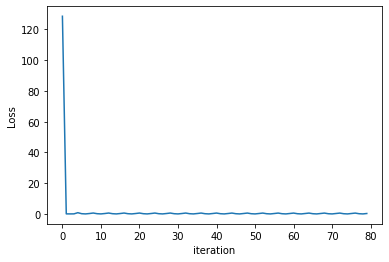

In [37]:
import matplotlib.pyplot as plt

# plot losses
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

In [38]:
W

tensor([1.2222], requires_grad=True)

In [39]:
b

tensor([0.1751], requires_grad=True)

# Tracing - N samples

In [40]:
import numpy as np
import torch

### Data preparation
data = np.genfromtxt('data.csv', delimiter=',')
X = torch.tensor(data[:,0:1])
y = torch.tensor(data[:,1:])

print(X)
print(y)

tensor([[6.7000],
        [4.6000],
        [3.5000],
        [5.5000]], dtype=torch.float64)
tensor([[9.1000],
        [5.9000],
        [4.6000],
        [6.7000]], dtype=torch.float64)


In [49]:
# theta
W = torch.tensor([-0.34], requires_grad=True)
b = torch.tensor([0.04], requires_grad=True)

# forward
def compute_output(X, W, b):
    return W*X + b

# some params
lr = 0.01
epochs = 1

In [50]:
# training
for epoch in range(epochs):
    # y_hat
    y_hat = compute_output(X, W, b)
    print('y_hat\n', y_hat)
            
    # loss
    loss = torch.mean(torch.square(y_hat - y))
    print('loss\n', loss)
        
    # gradient  
    loss.backward()
    #update  
    with torch.no_grad():    
      dW = W.grad
      db = b.grad
      # update
      W -= lr * dW
      b -= lr * db
      #Để tránh bị cộng dồn gradient nên gán nó ban đầu = 0
      W.grad.zero_()
      b.grad.zero_()

y_hat
 tensor([[-2.2380],
        [-1.5240],
        [-1.1500],
        [-1.8300]], dtype=torch.float64, grad_fn=<AddBackward0>)
loss
 tensor(72.3724, dtype=torch.float64, grad_fn=<MeanBackward0>)


# Training - N samples

In [57]:
# theta
W = torch.tensor([-0.34], requires_grad=True)
b = torch.tensor([0.04], requires_grad=True)

# forward
def compute_output(X, W, b):
    return W*X + b

# some params
lr = 0.01
epochs = 100
losses = []

# training
for epoch in range(epochs):
    # y_hat
    y_hat = compute_output(X, W, b)
    
    # loss
    loss = torch.mean(torch.square(y_hat - y))
                
    # debug
    losses.append(loss.item())

    # gradient  
    loss.backward()      
    with torch.no_grad():    
      dW = W.grad
      db = b.grad
      # update
      W -= lr * dW
      b -= lr * db
      #Để tránh bị cộng dồn gradient nên gán nó ban đầu = 0
      W.grad.zero_()
      b.grad.zero_()

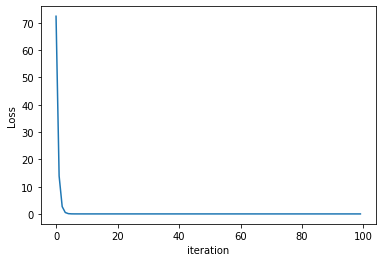

In [58]:
import matplotlib.pyplot as plt

# plot losses
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()